In [41]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [42]:
#importing the iris data set

dataset = pd.read_csv('irisdata.csv')

In [43]:
dataset.head(10)

,sepal.length,sepal.width,petal.length,petal.width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.4,3.9,1.7,0.4,Iris-setosa
4,4.4,2.9,1.4,0.2,Iris-setosa
5,4.9,3.1,1.5,0.1,Iris-setosa
6,5.4,3.7,1.5,0.2,Iris-setosa
7,4.8,3.4,1.6,0.2,Iris-setosa
8,4.3,3.0,1.1,0.1,Iris-setosa
9,5.8,4.0,1.2,0.2,Iris-setosa


In [44]:
dataset.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
dataset['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [46]:
X=dataset.iloc[:,[0,1,2,3]].values

In [47]:
#finding the optimum number of clusters for k-means algorithm 

wcss=[] #with in cluster sum of square error
for i in range(1,11):
    kmeans =KMeans(n_clusters = i, init = 'k-means++', max_iter=200, n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


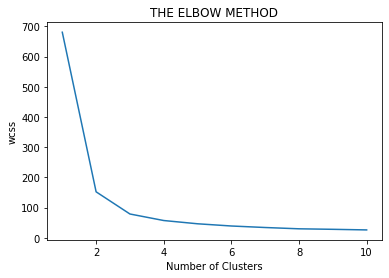

In [48]:
#ploting the results onto a line graph
#Elbow method
plt.plot(range(1,11),wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [49]:
#applying k-means algorithm to iris data set
kmeans =KMeans(n_clusters = 3, init = 'k-means++', max_iter=200, n_init = 10,random_state = 0)
y_kmeans = kmeans.fit_predict(X)

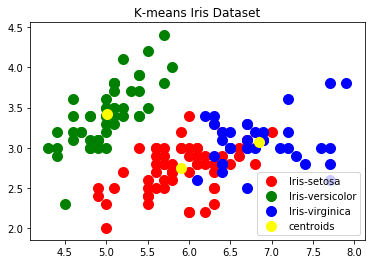

In [50]:
#Visualising the clusters with Scatter plot
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1], s = 100, c = 'green', label = 'Iris-versicolor')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1], s = 100, c = 'blue', label = 'Iris-virginica')

#plotting the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c= 'yellow', label = 'centroids')
plt.title('K-means Iris Dataset')

plt.legend()